# **Logistic Regression**

In [1]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/My Drive/semester7/MachineLearning/praktikum_ml/praktikum04/"

### 1. Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

### 2. Load Dataset

In [4]:
df = pd.read_csv(path + "/data/calonpembelimobil.csv")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


### 3. Cek struktur dan kebersihan data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [6]:
# cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [7]:
df.duplicated().sum()

np.int64(0)

### 4. Tentukan fitur & Target

In [8]:
TARGET = "Beli_Mobil"
drop_cols = ["ID"]  # buang kolom ID bila ada
num_cols  = ["Usia", "Memiliki_Mobil", "Penghasilan"]
cat_cols  = ["Status", "Kelamin"]

df = df.drop(columns=drop_cols, errors="ignore").copy()
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

X.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
0,32,1,0,0,240
1,49,2,1,1,100
2,52,1,0,2,250
3,26,2,1,1,130
4,45,3,0,2,237


### Heatmap Korelasi (numerik + target)

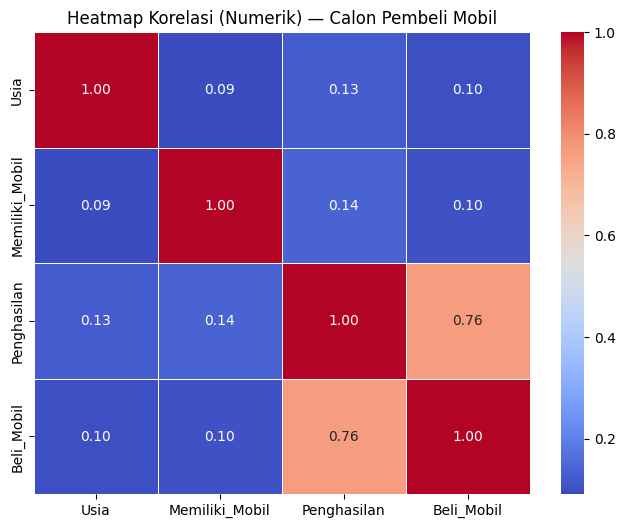

In [9]:
# Visualisasi heatmap korelasi antar variabel numerik dan target
import seaborn as sns
import matplotlib.pyplot as plt

# pakai kolom numerik + target (TARGET sudah didefinisikan sebelumnya)
num_for_corr = num_cols + [TARGET]

corr_matrix = df[num_for_corr].corr(method="pearson")

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi (Numerik) — Calon Pembeli Mobil", fontsize=12)
plt.show()

### 5. Split Train - Test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train.shape, X_test.shape

print("X train:", X_train.shape)
print("X test:", X_test.shape)

X train: (800, 5)
X test: (200, 5)


### 6. Buat preprocessing (scaler + one-hot) & model

In [11]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

logreg = LogisticRegression(
    max_iter=1000, solver="lbfgs",
    class_weight="balanced", random_state=42
)

clf = Pipeline(steps=[("prep", preprocess), ("model", logreg)])

### 7. Latih model

In [12]:
clf.fit(X_train, y_train)
print("✅ Model logistic regression dilatih.")

✅ Model logistic regression dilatih.


### 8. Prediksi & metrik utama

In [13]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print(f"Akurasi   : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score  : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test, y_prob):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Tidak Beli (0)","Beli (1)"]))

Akurasi   : 0.9100
Precision : 0.9739
Recall    : 0.8819
F1-Score  : 0.9256
ROC-AUC   : 0.9742

Classification Report:
                precision    recall  f1-score   support

Tidak Beli (0)       0.82      0.96      0.89        73
      Beli (1)       0.97      0.88      0.93       127

      accuracy                           0.91       200
     macro avg       0.90      0.92      0.91       200
  weighted avg       0.92      0.91      0.91       200



9. Visualisasi (Confusion Matrix & ROC)

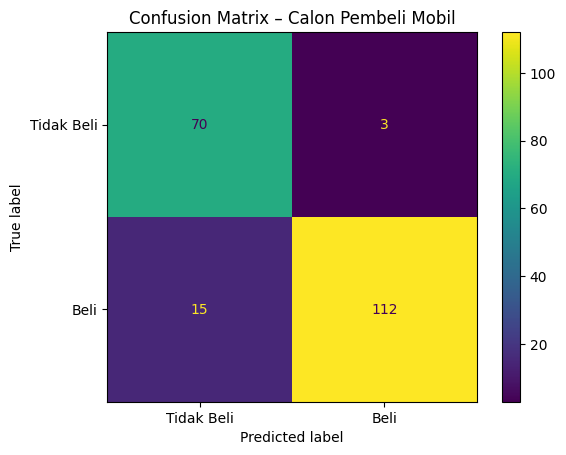

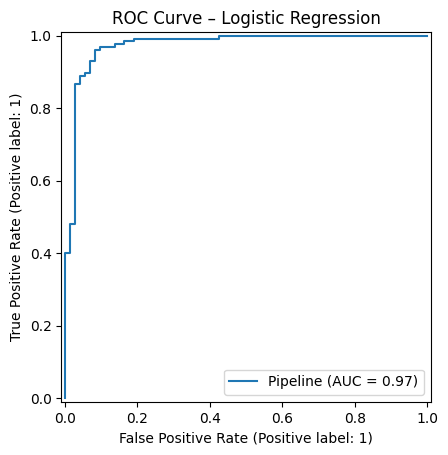

In [14]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=["Tidak Beli","Beli"]).plot(values_format='d')
plt.title("Confusion Matrix – Calon Pembeli Mobil")
plt.show()

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve – Logistic Regression")
plt.show()

### 10. Classification Report

In [15]:
# Classification Report
from sklearn.metrics import classification_report

print("=== Classification Report — Calon Pembeli Mobil ===")
print(classification_report(
    y_test,
    y_pred,
    target_names=["Tidak Beli (0)", "Beli (1)"]
))

=== Classification Report — Calon Pembeli Mobil ===
                precision    recall  f1-score   support

Tidak Beli (0)       0.82      0.96      0.89        73
      Beli (1)       0.97      0.88      0.93       127

      accuracy                           0.91       200
     macro avg       0.90      0.92      0.91       200
  weighted avg       0.92      0.91      0.91       200



### 11. Validasi silang (cv=5)

In [16]:
scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print("Skor tiap fold:", np.round(scores, 4))
print("Rata-rata akurasi:", scores.mean().round(4))
print("Standar deviasi  :", scores.std().round(4))

Skor tiap fold: [0.79  0.925 0.96  0.94  0.94 ]
Rata-rata akurasi: 0.911
Standar deviasi  : 0.0615


### 12. Interpretasi koefisien (Odds Ratio)

In [17]:
# nama fitur setelah OHE
ohe = clf.named_steps["prep"].named_transformers_["cat"]
ohe_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_cols + ohe_names

coefs = clf.named_steps["model"].coef_[0]
odds  = np.exp(coefs)

coef_df = pd.DataFrame({
    "Fitur": feature_names,
    "Koef (log-odds)": coefs,
    "Odds Ratio (e^coef)": odds
}).sort_values("Odds Ratio (e^coef)", ascending=False)

coef_df

,Fitur,Koef (log-odds),Odds Ratio (e^coef)
2,Penghasilan,4.642307,103.783465
7,Kelamin_0,0.562144,1.754430
4,Status_1,0.272451,1.313179
6,Status_3,0.216094,1.241219
3,Status_0,0.191445,1.210998
1,Memiliki_Mobil,0.054913,1.056448
0,Usia,-0.032585,0.967940
8,Kelamin_1,-0.565529,0.568059
5,Status_2,-0.683375,0.504910


### 13. Uji pada data baru

In [18]:
data_baru = pd.DataFrame({
    "Usia": [25, 42],
    "Status": [0, 2],          # 0=single, 1=menikah, 2=menikah punya anak, 3=duda/janda
    "Kelamin": [1, 0],         # 0=pria, 1=wanita
    "Memiliki_Mobil": [0, 2],
    "Penghasilan": [120, 350]  # jutaan/tahun
})
pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil["Prob_Beli"] = prob
hasil["Pred (0=Tidak,1=Beli)"] = pred
hasil

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prob_Beli,"Pred (0=Tidak,1=Beli)"
0,25,0,1,0,120,0.003026,0
1,42,2,0,2,350,0.997064,1


### 14. Menyimpan model

In [19]:
import os
from sklearn.linear_model import LinearRegression
import joblib

# Pastikan folder models/ ada
os.makedirs("/content/gdrive/MyDrive/semester7/MachineLearning/praktikum_ml/praktikum04/models", exist_ok=True)

model_path = "/content/gdrive/MyDrive/semester7/MachineLearning/praktikum_ml/praktikum04/models/model_logreg_mobil.pkl"
joblib.dump(clf, model_path)

['/content/gdrive/MyDrive/semester7/MachineLearning/praktikum_ml/praktikum04/models/model_logreg_mobil.pkl']